In [3]:
import pandas as pd
import numpy as np
from statistics import *
import heartpy as hp
pd.options.display.max_rows = 450

import pwv
import importlib
importlib.reload(pwv)

<module 'pwv' from '/home/anrath/projects/research/PWV/pwv.py'>

# Parameters

In [4]:
# List of Booleans. If True, returns a matplotlib plot of corresponding data. Bool 1 = unfiltered waveform. Bool 2 = filtered waveform. Bool 3 = segmented waveform.
preprocess_returnPlot = [True, True, True]
# Index of patient whose data will be shown in plots
preprocess_patPlotShow = 0
preprocess_plotID_patient = 0
preprocess_plotID_segment = 0

# Preprocessing

In [5]:
waveformData, segmentIndices, plots = pwv.preprocess("/home/anrath/projects/research/josie/PWV/full_demo/Raw Data", returnPlot=preprocess_returnPlot, patPlotShow=preprocess_patPlotShow)

/home/anrath/miniconda3/envs/bio/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anrath/miniconda3/envs/bio/lib/python3.10/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/anrath/miniconda3/envs/bio/lib/python3.10/site-packages/numpy/ma/core.py:5246: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
/home/anrath/miniconda3/envs/bio/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


## Filtering Waveforms

### Raw Waveforms

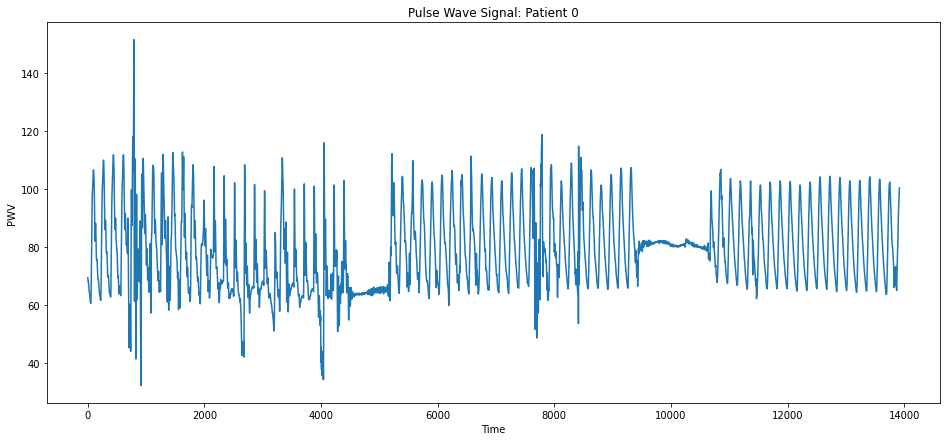

In [6]:
plots[0]

We can filter the waveform using highpass and lowpass Butterworth filters to get a smoother wave.

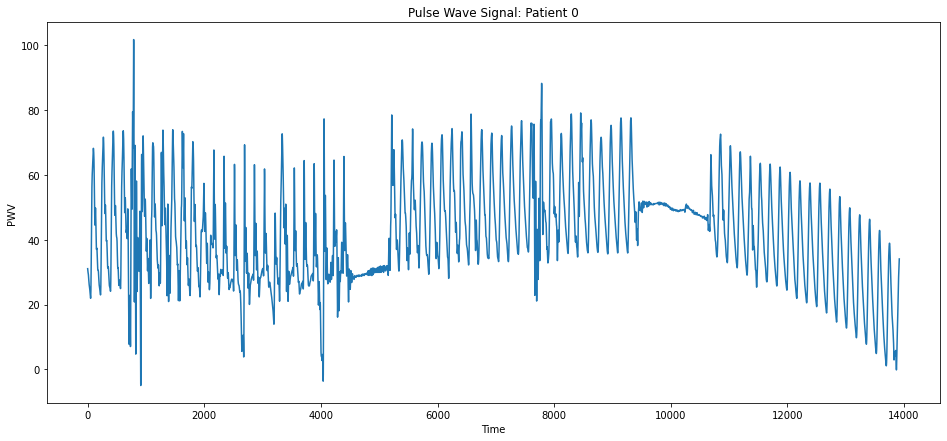

In [7]:
plots[1]

## Segmentation of Waveforms
Below is the filtered waveform for the selected patient. We will examine the first 4000 values.

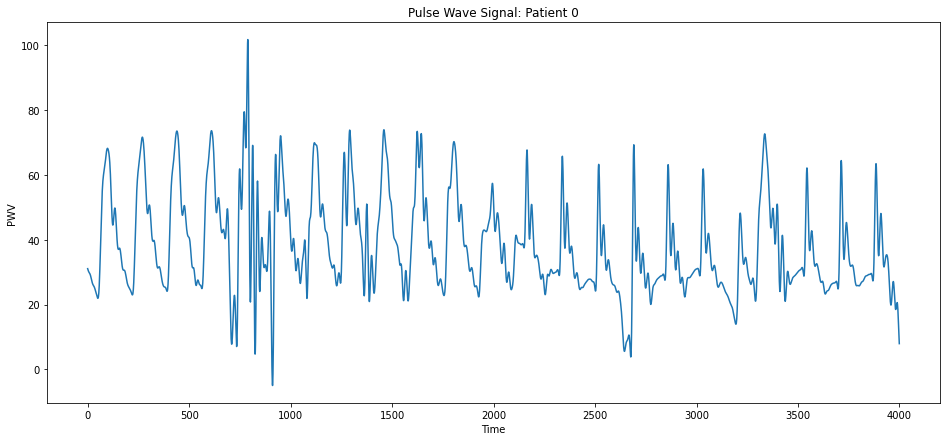

In [8]:
plots[2]

We can segment this waveform into each individual pulsewave.

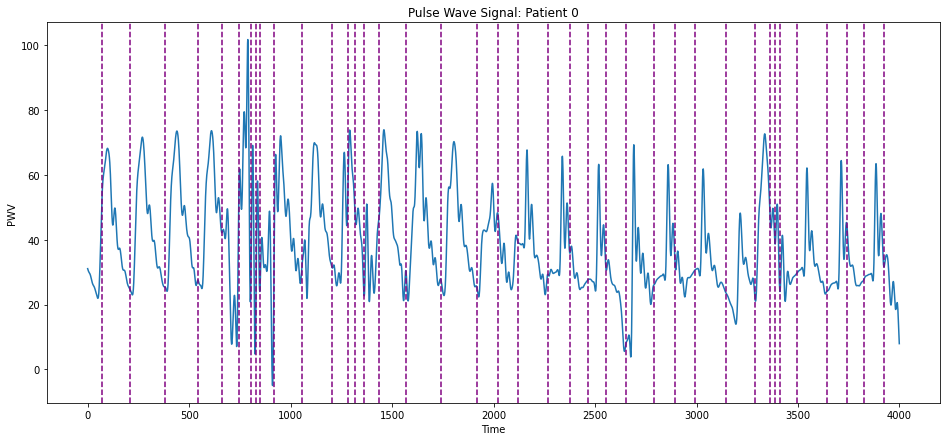

In [9]:
plots[3]

We can also plot inidivdual segments.

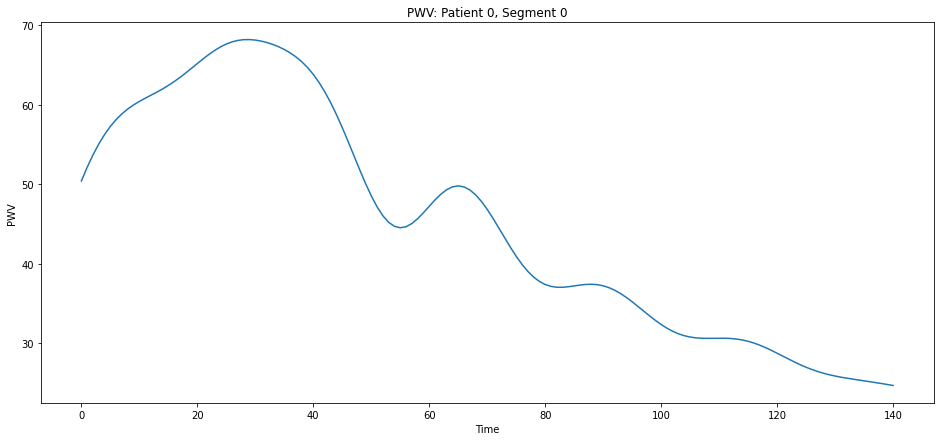

In [10]:
%matplotlib inline

plots = pwv.plotSegment(waveformData, segmentIndices)
plots.iloc[preprocess_plotID_patient, preprocess_plotID_segment]

In [11]:
%matplotlib notebook

plots, points, mets = pwv.interPlotSegment(waveformData, segmentIndices)
print(mets)
plots.iloc[preprocess_plotID_patient, preprocess_plotID_segment]

<IPython.core.display.Javascript object>

[6353.014166767447, 61.66998040228435, 1788.4294316662463, 29, 40.90020425900491, 111, 4539.922672749545, 60.302344841447955, -0.10290320327610417, 3376.9313111210845, 56, 58.833402942771805, 23.565605133848877, 1588.5018794548387, 27, 13.777321365074826, 15.246263263750976, 16.613898824587373, -4.15587731869207, -0.23802698756197596, 84, 35.13596182493697, 0.39975227083447606, 15.246263263750976]


<IPython.core.display.Javascript object>

# Metric Calculation

In [12]:
metrics = pwv.analyzeWave(waveformData, segmentIndices)

/home/anrath/projects/research/PWV/pwv.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append(stats, ignore_index = True)


In [13]:
metrics

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,6353.014167,61.669980,1788.429432,29.0,40.900204,111.0,4539.922673,60.302345,-0.102903,...,27.0,13.777321,15.246263,16.613899,-4.155877,-0.238027,84.0,35.135962,0.399752,15.246263
1,0.0,7459.819069,47.072788,2824.367254,60.0,42.293756,109.0,4610.019397,51.261719,0.274181,...,26.0,10.190231,0.523467,-3.665465,-8.444497,-0.273185,83.0,36.456371,2.631441,0.523467
2,0.0,7468.498449,48.214968,2892.898100,60.0,44.155620,103.0,4548.028832,52.472474,0.252294,...,28.0,11.047247,1.924021,-2.333485,-6.392833,-0.267320,75.0,37.644657,2.927924,1.924021
3,0.0,5947.293920,45.638575,3012.145954,66.0,55.633889,52.0,2892.962246,50.471207,0.228446,...,26.0,9.765303,-2.502147,-7.334779,2.660535,-0.244448,26.0,48.529122,4.431989,-2.502147
4,0.0,3693.801047,68.374290,2803.345888,41.0,57.660432,15.0,864.906479,66.290820,-0.714018,...,14.0,34.640551,40.742140,42.825610,32.111752,3.291441,1.0,22.257239,3.291441,40.742140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,20.0,6189.962223,21.689797,2472.636815,114.0,31.372667,118.0,3701.974684,27.292880,0.206983,...,31.0,10.457689,-10.147198,-15.750281,-6.067411,-0.237045,87.0,25.484413,1.466404,-10.147198
1468,20.0,3321.677713,19.655360,1395.530573,71.0,21.518899,89.0,1915.182042,22.106295,0.102306,...,21.0,6.179334,-2.107159,-4.558094,-2.694554,-0.193986,68.0,18.778434,0.057273,-2.107159
1469,20.0,2881.970619,21.755482,826.708331,38.0,14.955502,137.0,2048.903757,23.345745,0.178264,...,26.0,7.617092,5.292861,3.702599,-3.097382,-0.144031,111.0,12.445805,-4.293127,5.292861
1470,20.0,4888.170970,21.588501,1597.549085,74.0,25.055623,131.0,3282.286573,27.930015,0.257024,...,31.0,8.661718,-6.476090,-12.817604,-9.350483,-0.251095,100.0,19.471840,0.961330,-6.476090


# Machine Learning

In [14]:
metrics = metrics[metrics[0]!= 5]
metrics = metrics[metrics[0]!= 17]

outcomes = [0,1,1,0,1,-1,1,0,0,0,0,0,1,1,1,0,0,-1,0,0,1,0]

metrics['25'] = metrics.apply(lambda row: outcomes[int(row[0])], axis=1)
metrics = metrics.dropna()
metrics

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,6353.014167,61.669980,1788.429432,29.0,40.900204,111.0,4539.922673,60.302345,-0.102903,...,13.777321,15.246263,16.613899,-4.155877,-0.238027,84.0,35.135962,0.399752,15.246263,0
1,0.0,7459.819069,47.072788,2824.367254,60.0,42.293756,109.0,4610.019397,51.261719,0.274181,...,10.190231,0.523467,-3.665465,-8.444497,-0.273185,83.0,36.456371,2.631441,0.523467,0
2,0.0,7468.498449,48.214968,2892.898100,60.0,44.155620,103.0,4548.028832,52.472474,0.252294,...,11.047247,1.924021,-2.333485,-6.392833,-0.267320,75.0,37.644657,2.927924,1.924021,0
3,0.0,5947.293920,45.638575,3012.145954,66.0,55.633889,52.0,2892.962246,50.471207,0.228446,...,9.765303,-2.502147,-7.334779,2.660535,-0.244448,26.0,48.529122,4.431989,-2.502147,0
4,0.0,3693.801047,68.374290,2803.345888,41.0,57.660432,15.0,864.906479,66.290820,-0.714018,...,34.640551,40.742140,42.825610,32.111752,3.291441,1.0,22.257239,3.291441,40.742140,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,20.0,6189.962223,21.689797,2472.636815,114.0,31.372667,118.0,3701.974684,27.292880,0.206983,...,10.457689,-10.147198,-15.750281,-6.067411,-0.237045,87.0,25.484413,1.466404,-10.147198,1
1468,20.0,3321.677713,19.655360,1395.530573,71.0,21.518899,89.0,1915.182042,22.106295,0.102306,...,6.179334,-2.107159,-4.558094,-2.694554,-0.193986,68.0,18.778434,0.057273,-2.107159,1
1469,20.0,2881.970619,21.755482,826.708331,38.0,14.955502,137.0,2048.903757,23.345745,0.178264,...,7.617092,5.292861,3.702599,-3.097382,-0.144031,111.0,12.445805,-4.293127,5.292861,1
1470,20.0,4888.170970,21.588501,1597.549085,74.0,25.055623,131.0,3282.286573,27.930015,0.257024,...,8.661718,-6.476090,-12.817604,-9.350483,-0.251095,100.0,19.471840,0.961330,-6.476090,1


In [15]:
x_train, x_test, y_train, y_test = pwv.MLSplit(metrics)

np.where(metrics.values >= np.finfo(np.float32).max)

(array([], dtype=int64), array([], dtype=int64))

In [16]:
z, accuracy, precision, recall = pwv.logistic(x_train, x_test, y_train, y_test)
print(z)
print("Accuracy:", accuracy) # metrics.accuracy_score(y_test, y_pred)
print("Precision:", precision) # metrics.precision_score(y_test, y_pred)
print("Recall:", recall) # metrics.recall_score(y_test, y_pred)

     True  Prediction
0       1           1
1       1           1
2       1           1
3       0           1
4       0           1
5       1           1
6       1           1
7       1           1
8       1           1
9       1           1
10      1           1
11      1           1
12      0           1
13      1           0
14      0           0
15      1           1
16      0           1
17      1           1
18      1           1
19      0           1
20      0           0
21      1           1
22      1           1
23      0           1
24      0           0
25      1           1
26      1           1
27      1           0
28      1           1
29      0           0
30      1           1
31      0           1
32      1           1
33      1           1
34      1           0
35      1           1
36      1           1
37      1           1
38      0           0
39      1           1
40      0           1
41      0           1
42      0           1
43      0           0
44      1 

/home/anrath/miniconda3/envs/bio/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
z, accuracy, precision, recall = pwv.decisionTree(x_train, x_test, y_train, y_test)
print(z)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

     True  Prediction
0       1           1
1       1           1
2       1           1
3       0           0
4       0           1
5       1           0
6       1           1
7       1           0
8       1           1
9       1           0
10      1           1
11      1           1
12      0           0
13      1           1
14      0           0
15      1           1
16      0           1
17      1           1
18      1           1
19      0           0
20      0           0
21      1           0
22      1           1
23      0           0
24      0           1
25      1           1
26      1           1
27      1           1
28      1           1
29      0           0
30      1           1
31      0           1
32      1           1
33      1           1
34      1           1
35      1           1
36      1           1
37      1           1
38      0           0
39      1           1
40      0           0
41      0           0
42      0           1
43      0           0
44      1 

In [18]:
z, accuracy, precision, recall = pwv.sv(x_train, x_test, y_train, y_test)
print(z)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

     True  Prediction
0       1           1
1       1           1
2       1           1
3       0           1
4       0           1
5       1           1
6       1           1
7       1           1
8       1           1
9       1           1
10      1           1
11      1           1
12      0           1
13      1           1
14      0           1
15      1           1
16      0           1
17      1           1
18      1           1
19      0           1
20      0           1
21      1           1
22      1           1
23      0           1
24      0           1
25      1           1
26      1           1
27      1           1
28      1           1
29      0           1
30      1           1
31      0           1
32      1           1
33      1           1
34      1           1
35      1           1
36      1           1
37      1           1
38      0           1
39      1           1
40      0           1
41      0           1
42      0           1
43      0           1
44      1 

In [19]:
z, accuracy, precision, recall = pwv.KNeighbors(x_train, x_test, y_train, y_test)
print(z)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

     True  Prediction
0       1           1
1       1           1
2       1           1
3       0           0
4       0           1
5       1           0
6       1           1
7       1           1
8       1           1
9       1           0
10      1           1
11      1           0
12      0           1
13      1           1
14      0           1
15      1           0
16      0           1
17      1           1
18      1           1
19      0           0
20      0           0
21      1           1
22      1           1
23      0           1
24      0           1
25      1           1
26      1           1
27      1           0
28      1           1
29      0           0
30      1           1
31      0           1
32      1           1
33      1           1
34      1           1
35      1           0
36      1           0
37      1           1
38      0           1
39      1           1
40      0           1
41      0           1
42      0           1
43      0           0
44      1 

In [20]:
z, accuracy, precision, recall = pwv.gaussianNB(x_train, x_test, y_train, y_test)
print(z)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

     True  Prediction
0       1           0
1       1           0
2       1           0
3       0           0
4       0           0
5       1           0
6       1           0
7       1           0
8       1           0
9       1           0
10      1           0
11      1           0
12      0           0
13      1           0
14      0           0
15      1           0
16      0           0
17      1           0
18      1           0
19      0           0
20      0           0
21      1           1
22      1           0
23      0           0
24      0           0
25      1           0
26      1           0
27      1           0
28      1           0
29      0           0
30      1           0
31      0           0
32      1           0
33      1           0
34      1           0
35      1           0
36      1           0
37      1           0
38      0           0
39      1           0
40      0           0
41      0           0
42      0           0
43      0           0
44      1 